In [11]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pipetorch.data import DFrame
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [2]:
simulatie = pd.read_csv('Uiteindelijk dataset food Heel Groot.csv')
simulatie.shape

(70000, 91)

In [3]:
target_rows = [i for i in range(1,14000) if i%6==0]

a = simulatie.iloc[[i for i in simulatie.index if i not in target_rows], :]
b = simulatie.iloc[target_rows, :]
t = pd.concat([a, b])
t.tail(10)

,favo_Aziatische noedelsalade met tofu,favo_Aziatische roerbak met varkenssaté,favo_Champignonragout met groene asperges,favo_Chinese balletjes in zoetzure saus,favo_Eenpansnoedels met vega kip en wokgroente,"favo_Falafel-quinoaburger met zuivelspread, slamelange, rode biet en komkommer",favo_Gebakken gnocchi met spekjes en spruitjes,favo_Groenten in Thaise currysaus,favo_Hoisinnoedels met gehakt en groene groenten,favo_Kip roerbak met sperziebonen en rijst,...,voorspel_Spinazie-couscoussalade met ei,voorspel_Spinaziecurry met ei,voorspel_Supersnel rijstpannetje met tuinbonen,voorspel_Tomaten-tuinbonensalade,voorspel_Vegan curry met pitabroodjes,voorspel_Vegetarische wokschotel met bloemkoolrijst en sweet chilisaus,"voorspel_Volkorenpasta met kip, Chinese kool, gember en tahin",voorspel_Wokschotel met verse-kaasblokjes,voorspel_Zomerse chili con carne,target
13944,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
13950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
13956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
13962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
13968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
13974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
13980,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
13986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
13992,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
13998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
# Hieronder de voobereidingen om de RandomForestClassifier te gebruiken op deze data. 
# En de voorbereiding voor het finetunen van de hyperparameters

X = t.drop(t.columns[-1], axis = 1).values
y = t[t.columns[-1]].values

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-6/7 ,shuffle = False, stratify = None)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [9]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
max_depth = [20, 50, 100]
min_samples_split = [5,10, 25]
min_samples_leaf = [1, 2]

In [10]:
param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}
print(param_grid)

{'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'max_depth': [20, 50, 100], 'min_samples_split': [5, 10, 25], 'min_samples_leaf': [1, 2]}


In [11]:
# Het finetunen van de hyperparameters van de RandomForestClassifier

rfr = RandomForestClassifier()

rf_Grid = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, verbose=2, n_jobs=4)
rf_Grid.fit(X_train, y_train)
rf_Grid.best_params_

Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   3.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=340; total time=   9.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=450; total time=  12.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=560; total time=  15.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=780; total time=  21.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=890; total time=  24.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  31.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=450; total time=  12.4s
[CV] END max_depth=20, min_

/opt/jupyterhub/anaconda/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   3.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=230; total time=   6.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=340; total time=   9.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=560; total time=  15.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=670; total time=  18.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=780; total time=  21.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  27.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=230; total time=   6.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=340; total time=   9.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=450; total

{'max_depth': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 25,
 'n_estimators': 340}

In [12]:
print(f'Train Accuracy - : {rf_Grid.score(X_train, y_train):3f}')
print(f'Test Accuracy - : {rf_Grid.score(X_test, y_test):3f}')

Train Accuracy - : 0.919625
Test Accuracy - : 0.886000


In [45]:
X = simulatie.drop(simulatie.columns[-1], axis = 1).values
y = simulatie[simulatie.columns[-1]].values

[[5895 1182]
 [ 412 6511]]
accuracy: 0.8861428571428571
precision: 0.846353828155466
recall: 0.9404882276469738
[[5934 1143]
 [ 641 6282]]
accuracy: 0.8725714285714286
precision: 0.8460606060606061
recall: 0.9074100823342481


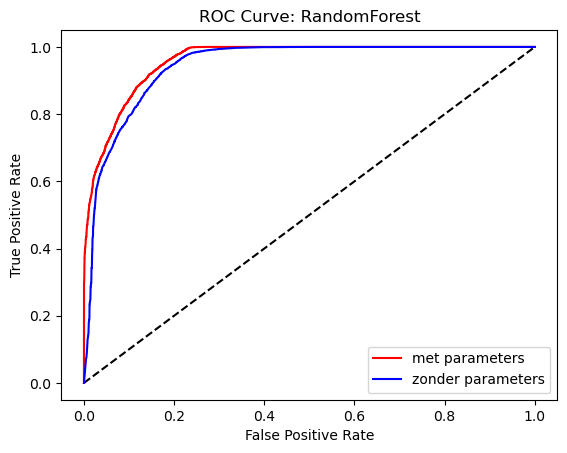

[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=780; total time=  33.2s
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=890; total time=  37.9s
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=25, n_estimators=10; total time=   0.4s
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=25, n_estimators=10; total time=   0.4s
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=25, n_estimators=10; total time=   0.4s
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=25, n_estimators=120; total time=   4.9s
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=25, n_estimators=120; total time=   5.0s
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=25, n_estimators=120; total time=   5.0s
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=25, n_estimators=230; total time=   9.4s
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=25, n_estimato

In [13]:
# Uit de GridSearchCV van hierboven zijn de optiale hyperparameters gehaald
# We kijken hier naar het verschil tussen een model met en zonder optimale hyperparameters

rfr_1 = RandomForestClassifier(max_depth=100, min_samples_leaf=1, min_samples_split=25, n_estimators=340, bootstrap=False)
rfr_1.fit(X_train, y_train)
pred_y = rfr_1.predict(X_test)
y_pred_prob = rfr_1.predict_proba(X_test)[:,1]
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
accuracy = accuracy_score(y_test, pred_y)
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pred_prob)

print(confusion_matrix(y_test, pred_y))
print(f"accuracy: {accuracy}" )
print(f"precision: {precision}" )
print(f"recall: {recall}")

rfr = RandomForestClassifier()
rfr.fit(X_train, y_train)
pred_y = rfr.predict(X_test)
y_pred_prob = rfr.predict_proba(X_test)[:,1]
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
accuracy = accuracy_score(y_test, pred_y)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


print(confusion_matrix(y_test, pred_y))
print(f"accuracy: {accuracy}" )
print(f"precision: {precision}" )
print(f"recall: {recall}")

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_1, tpr_1, color = 'red', label = 'met parameters')
plt.plot(fpr, tpr, color = 'blue', label = 'zonder parameters')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: RandomForest')
plt.legend()
plt.show()